In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle, copy
from Networkmodel import NetworkModel_org, HopField

In [2]:
class NetworkModel(NetworkModel_org):
    def task_condition(self):
        self.condition = np.array([1,2,3,4,5]) 
        self.actdict = {1: [2], 2: [4,5], 3: [2], 4:[3], 5:[1]}
        self.initial = 1
        self.terminal = [4,5]
        self.prob = 1
        self.stmdict = {1: [1], 2: [2], 3: [3], 4:[4], 5:[5]}
        self.cortex_calc = [1]
        self.stmindex = {1:0, 2:0, 3:0, 4:0, 5:0}
        self.swblock = 0
        self.HFregister = dict()
        self.condact = {i:[] for i in self.condition}
        for key,val in self.stmdict.items():
            for s in val:
                tmp = np.zeros(self.nstm)
                tmp[np.sort(np.random.choice(len(tmp), int(len(tmp)/2), replace = False))] = 1  
                self.HFregister[s] = tmp

    def check_rwd(self, result, count):
        if not result[-1]["cond"] in self.terminal:
            return 0
        tmp1 = result[-1]["infcond"]
        tmp2 = [result[r]["cond"] for r in range(len(result))]
        if self.swblock == 0:
            if int(4 in tmp2 or 4 in tmp1):
                self.swblock = 1
                return 1
            else:
                return 0 
        else:
            if int(5 in tmp2 or 5 in tmp1):
                self.swblock = 0
                return 1
            else:
                return 0

In [3]:
allresult = dict()
x = 0

In [4]:
hp = NetworkModel(200,1000,300,1200,8)
result = []
HCprev = []
cond = None
for i in range(30):
    result_,HCprev,cond = hp.process(i, HCprev, cond, verbose = True)
    result.append(result_)
#allresult[x] = result
x += 1

trial 0 stmindex 0 HCprev []
HCprev []
0-0 [157]
plan 1 [] 2
init 1 2
memo 1 0
HF2HC [138] 1-0
HC2HF [138] 1-0
pkup [138] 1-0
choose [1. 2.] [138  36]
HF2HC [138] 1-0
HC2HF [138] 1-0
HCprev [array([36], dtype=int64)]
0-0 [156]
plan 2 [] 4
init 2 4
memo 2 0
HF2HC [9] 2-0
HC2HF [9] 2-0
pkup [9] 2-0
choose [2. 4.] [ 9 68]
HC2HF [36] 2-0
HF2HC [9] 2-0
HC2HF [9] 2-0
HCprev [array([68], dtype=int64)]
0-0 [172]
plan 4 [] 3
init 4 3
memo 4 0
HF2HC [71] 4-0
HC2HF [71] 4-0
pkup [71] 4-0
choose [4. 3.] [71 55]
HC2HF [68] 4-0
HF2HC [71] 4-0
HC2HF [71] 4-0
check trans [4.0] {}
['c:1', 'n:2.0', 'e:0.0', 'i:[1.0]', 'p:[1.0, 2.0]', 'H:[138  36]', 'a:1-0', 'r:0']
['c:2', 'n:4.0', 'e:0.0', 'i:[2.0]', 'p:[2.0, 4.0]', 'H:[36  9 68]', 'a:2-0', 'r:0']
['c:4', 'n:3', 'e:0.0', 'i:[4.0, 3.0]', 'p:[4.0, 3.0]', 'H:[68 71 55]', 'a:4-0', 'r:1', "p:['1-0', '2-0', '4-0']"]

trial 1 stmindex 0 HCprev [71 55]
HCprev [array([71], dtype=int64), array([55], dtype=int64)]
0-0 [229]
plan 3 [] 2
init 3 2
memo 3 0
HF2HC [255

HF2HC [138] 1-0
HC2HF [138] 1-0
tested ['1.0-0', '4.0-0', '2.0-0']
check trans [3.0, 1.0, 2.0, 4.0, 3.0] {}
['c:1', 'n:4.0', 'e:0.857758242863828', 'i:[1.0, 2.0, 4.0]', 'p:[1.0, 2.0, 4.0]', 'H:[151 138  36   9  68  71  55]', 'a:1-0', 'r:0']
['c:4', 'n:3', 'e:0.857758242863828', 'i:[1.0, 2.0, 4.0]', 'p:[1.0, 2.0, 4.0]', 'H:[151 138  36   9  68  71  55]', 'a:4-0', 'r:1', "p:['1-0', '2-0', '4-0', '3-0', '2-1', '5-0']"]

trial 25 stmindex 0 HCprev 55
HCprev [array([55], dtype=int64)]
3-0 [255]
choose [3. 2. 5.] [255 254  67  54 162 151]
HC2HF [55] 3-0
HF2HC [255] 3-0
HC2HF [255] 3-0
check trans [1.0, 3.0, 2.0, 5.0, 1.0] {}
['c:3', 'n:5.0', 'e:0.857758242863828', 'i:[3.0, 2.0, 5.0]', 'p:[3.0, 2.0, 5.0]', 'H:[ 55 255 254  67  54 162 151]', 'a:3-0', 'r:0']
['c:5', 'n:1', 'e:0.857758242863828', 'i:[3.0, 2.0, 5.0]', 'p:[3.0, 2.0, 5.0]', 'H:[ 55 255 254  67  54 162 151]', 'a:5-0', 'r:1', "p:['1-0', '2-0', '4-0', '3-0', '2-1', '5-0']"]

trial 26 stmindex 0 HCprev 151
HCprev [array([151], dtype=in

In [5]:
num = 40
trialnum = 30
allresult = dict() #np.zeros((num,trialnum))*np.nan
x = 0
errcounter = 0
while x < num:
    print(x)
    hp = NetworkModel(200,1000,300,1200,8)
    result = []
    HCprev = []
    cond = None
    try:
        for i in range(trialnum):
            result_,HCprev,cond = hp.process(i, HCprev, cond,verbose = False)
            result.append(result_)
        allresult[x] = result
    except:
        print("error",x)
        allresult[x] = result
        errcounter += 1
    #if result[-1][-1]["rwd"] == 0:
    #    break
    x += 1
print(errcounter)

0
init 1 2
init 2 4
init 4 3
init 3 2
init 2 5
init 5 1
1
init 1 2
init 2 4
init 4 3
init 3 2
init 2 5
init 5 1
2
init 1 2
init 2 5
init 5 1
actremapping [236 116] [236 271]
init 4 3
init 3 2
init 2 5
init 5 1
3
init 1 2
init 2 4
init 4 3
init 3 2
init 2 5
init 5 1
4
init 1 2
init 2 5
init 5 1
actremapping [ 96 113] [96 56]
init 4 3
init 3 2
init 2 5
init 5 1
5
init 1 2
init 2 4
init 4 3
init 3 2
init 2 5
init 5 1
6
init 1 2
init 2 5
init 5 1
actremapping [18 97] [ 18 160]
init 4 3
init 3 2
init 2 5
init 5 1
7
init 1 2
init 2 4
init 4 3
init 3 2
init 2 5
init 5 1
8
init 1 2
init 2 4
init 4 3
init 3 2
init 2 5
init 5 1
9
init 1 2
init 2 4
init 4 3
init 3 2
init 2 5
init 5 1
10
init 1 2
init 2 5
init 5 1
actremapping [273 191] [273  80]
init 4 3
init 3 2
init 2 5
init 5 1
11
init 1 2
init 2 4
init 4 3
init 3 2
init 2 5
init 5 1
12
init 1 2
init 2 4
init 4 3
init 3 2
init 2 5
init 5 1
13
init 1 2
init 2 4
init 4 3
init 3 2
init 2 5
init 5 1
14
init 1 2
init 2 5
init 5 1
actremapping [ 89 

In [6]:
with open("./pkls/splitter_cell.pkl", mode = "wb") as f:
    pickle.dump(allresult, f)

In [7]:
with open("./pkls/splitter_cell.pkl", mode = "rb") as f:
    allresult = pickle.load(f)
num = len(allresult)
trialnum = np.max([len(allresult[x]) for x in range(num)])

In [8]:
rwdrate = np.zeros((num,trialnum))
for x in range(num):
    tmp = [res[-1]["rwd"] for r, res in enumerate(allresult[x])]
    rwdrate[x,:len(tmp)] = tmp

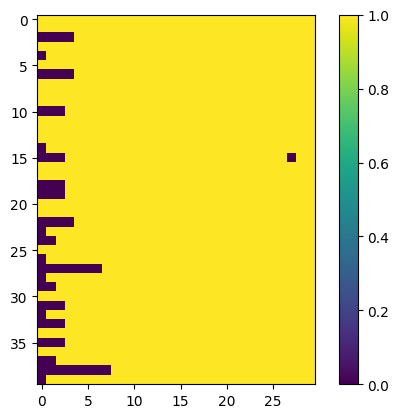

In [9]:
plt.imshow(rwdrate)
plt.colorbar()

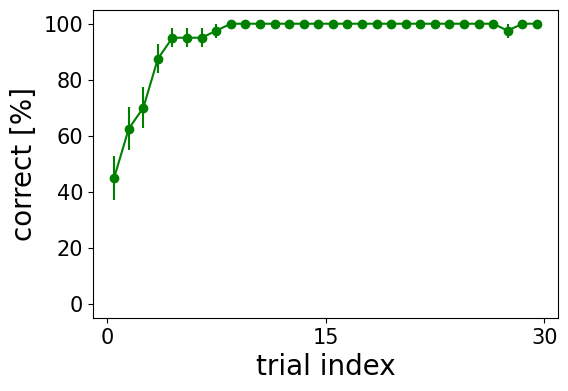

In [10]:
plt.figure(figsize = (6,4))
#for i in range(1,int(trialnum/hp.swblock)):
#    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [-5,105], "--",color = "#555555")
plt.errorbar(np.arange(trialnum), np.nanmean(rwdrate,0)*100, 100*np.nanstd(rwdrate,0)/np.sqrt(num),fmt="go-")
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("correct [%]", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,15),np.arange(0,trialnum+1,15), fontsize = 15)
plt.yticks(fontsize = 15) 
plt.ylim([-5,105])
plt.savefig("./figure/splitter_cell_correct.png", bbox_inches = "tight")

In [11]:
inflen = np.zeros((num,trialnum))*np.nan
for x in range(num):
    tmp = [int((len(allresult[x][r][-1]["HCtrans"])-1)/2) for r in range(len(allresult[x]))]
    inflen[x,:len(tmp)] = tmp

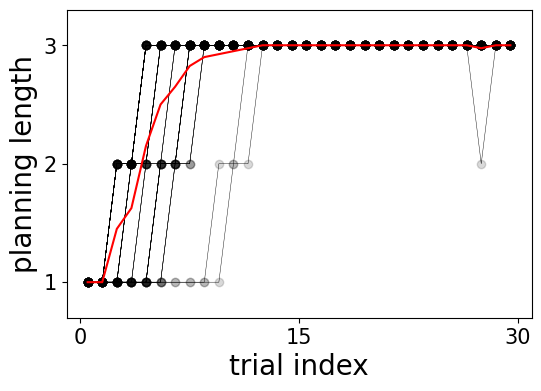

In [12]:
plt.figure(figsize = (6,4))
#for i in range(1,int(trialnum/hp.swblock)):
#    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [0,5], "--",color = "#555555")
for i in range(num):
    plt.plot(np.arange(trialnum), inflen[i,:]+np.random.rand(trialnum)*0, "ko-", linewidth = 0.3, markerfacecolor = (0,0,0,0.15))
    #plt.plot(np.arange(trialnum), inflen[i,:]+np.random.rand(trialnum)*0, "ko-", linewidth = 0.5)
plt.plot(np.arange(trialnum), np.nanmean(inflen,0), "r")
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("planning length", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,15),np.arange(0,trialnum + 1,15), fontsize = 15)
plt.yticks([1,2,3],fontsize = 15)
plt.ylim([.7,3.3])
plt.savefig("./figure/splitter_cell_inflen.png", bbox_inches = "tight")

In [13]:
for x in range(1):
    allHCs, allinfs = [], []
    if len(allresult[x]) != trialnum:
        continue
    for y in range(trialnum):
        HCs = []
        for z in range(len(allresult[x][y])):
            tmp = copy.deepcopy(allresult[x][y][z]["HCtrans"])
            if len(tmp) % 2 == 1:
                tmp = tmp[1:]
            arg = np.isin(tmp, HCs)
            HCs.extend(list(tmp[~arg]))
            tmp = allresult[x][y][z]["infcond"]
            if z == 0:
                infs = copy.deepcopy(tmp)
            elif infs[-1] == tmp[0]:
                infs.extend(tmp[1:])
            elif infs[-1] == tmp[-1]:
                continue
            else:
                print(x,y,z,tmp, infs, len(HCs))
        if HCs[0] == HCs[-1]:
            HCs = HCs[:-1]
        if infs[0] == infs[-1]:
            infs = infs[:-1]
        HCs = HCs[:len(infs)*2]
        allHCs.append(HCs)
        allinfs.append(infs)

0 0 1 [2.0] [1.0] 4
0 0 2 [4.0, 3.0] [1.0] 6
0 1 1 [2.0] [3.0] 6
0 1 2 [5.0, 1.0] [3.0] 8


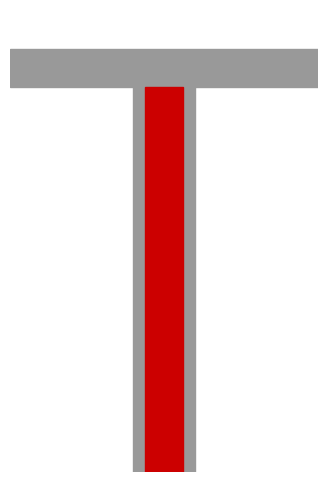

In [14]:
import matplotlib.patches as patches
fig = plt.figure(figsize = (4,6))
ax = plt.axes()
ax.set_aspect('equal')
r = patches.Rectangle(xy=(0.1, 0.8), width=0.8, height=0.1, ec='#999999', fc = '#999999',fill=True)
ax.add_patch(r)
r = patches.Rectangle(xy=(0.42, -0.2), width=0.16, height=1, ec='#999999', fc = '#999999',fill=True)
ax.add_patch(r)
r = patches.Rectangle(xy=(0.45, -0.2), width=0.1, height=1, ec='#cc0000', fc = '#cc0000',fill=True)
ax.add_patch(r)
plt.xlim([0.1,0.9])
plt.ylim([-0.2,1])
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig("./figure/splitter_cell_right.png", bbox_inches = "tight")

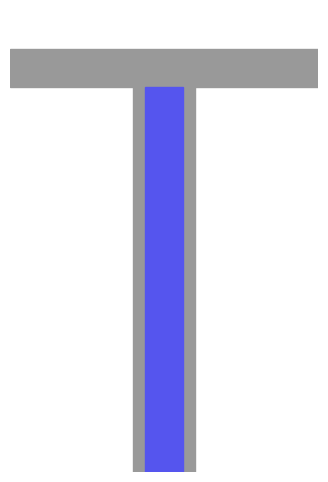

In [15]:
import matplotlib.patches as patches
fig = plt.figure(figsize = (4,6))
ax = plt.axes()
ax.set_aspect('equal')
r = patches.Rectangle(xy=(0.1, 0.8), width=0.8, height=0.1, ec='#999999', fc = '#999999',fill=True)
ax.add_patch(r)
r = patches.Rectangle(xy=(0.42, -0.2), width=0.16, height=1, ec='#999999', fc = '#999999',fill=True)
ax.add_patch(r)
r = patches.Rectangle(xy=(0.45, -0.2), width=0.1, height=1, ec='#5555ee', fc = '#5555ee',fill=True)
ax.add_patch(r)
plt.xlim([0.1,0.9])
plt.ylim([-0.2,1])
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig("./figure/splitter_cell_left.png", bbox_inches = "tight")

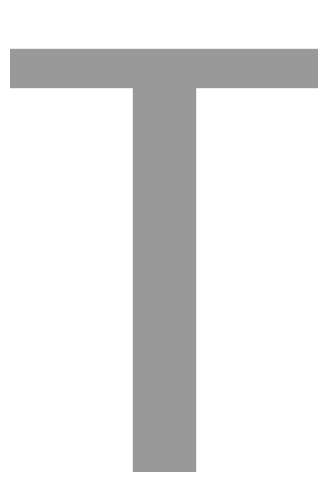

In [16]:
import matplotlib.patches as patches
fig = plt.figure(figsize = (4,6))
ax = plt.axes()
ax.set_aspect('equal')
r = patches.Rectangle(xy=(0.1, 0.8), width=0.8, height=0.1, ec='#999999', fc = '#999999',fill=True)
ax.add_patch(r)
r = patches.Rectangle(xy=(0.42, -0.2), width=0.16, height=1, ec='#999999', fc = '#999999',fill=True)
ax.add_patch(r)
plt.xlim([0.1,0.9])
plt.ylim([-0.2,1])
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig("./figure/splitter_cell_None.png", bbox_inches = "tight")